# Student Feedback Analysis — Task 3  
**Author:** Rubesh S  
**Dataset:** `student_feedback.csv` — **1001 responses**

---

In [66]:
import pandas as pd

# Read uploaded file (replace filename if different)
df = pd.read_csv("student_feedback.csv")

# Show first 5 rows
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [67]:
# Run once in Colab
%pip -q install pandas matplotlib seaborn nltk vaderSentiment wordcloud textblob openpyxl
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')   # for TextBlob


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
import pandas as pd
from google.colab import files, drive
import os

# ---------- A) Upload local file ----------
# Uncomment if you want to upload manually
# uploaded = files.upload()
# fname = next(iter(uploaded))   # picks the first uploaded file
# df = pd.read_csv(fname) if fname.lower().endswith('.csv') else pd.read_excel(fname)

# ---------- B) From Google Drive ----------
# Uncomment if using Google Drive
# drive.mount('/content/drive')
# path = "/content/drive/MyDrive/student_feedback.csv"  # update path if needed
# df = pd.read_csv(path) if path.lower().endswith('.csv') else pd.read_excel(path)

# ---------- C) Default: Load dataset from working directory ----------
df = pd.read_csv("student_feedback.csv")

# Drop redundant index column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("Loaded rows:", len(df))
df.head()


Loaded rows: 1001


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [69]:
# Quick inspections
print("Columns:", df.columns.tolist())

print("\nSample rows:")
display(df.head(8))

print("\nInfo:")
df.info()

print("\nMissing values per column:")
print(df.isna().sum())

print("\nBasic statistics:")
display(df.describe())


Columns: ['Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

Sample rows:


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9
5,832,7,2,7,8,3,5,1,4
6,772,9,3,5,2,10,3,8,1
7,961,9,8,7,4,4,3,3,10



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Student ID                                            1001 non-null   int64
 1   Well versed with the subject                          1001 non-null   int64
 2   Explains concepts in an understandable way            1001 non-null   int64
 3   Use of presentations                                  1001 non-null   int64
 4   Degree of difficulty of assignments                   1001 non-null   int64
 5   Solves doubts willingly                               1001 non-null   int64
 6   Structuring of the course                             1001 non-null   int64
 7   Provides support for students going above and beyond  1001 non-null   int64
 8   Course recommendation based on relevance              1001 non-null   in

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [70]:
# Standardize column names (strip spaces)
df = df.rename(columns=lambda c: str(c).strip())

# Drop extra index column if it still exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Verify required structure
print("Columns after cleaning:", df.columns.tolist())

# Ensure all columns are numeric
numeric_cols = df.columns.drop("Student ID") if "Student ID" in df.columns else df.columns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with any missing numeric values
df = df.dropna(subset=numeric_cols).reset_index(drop=True)

print("After cleaning rows:", len(df))
df.head()



Columns after cleaning: ['Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']
After cleaning rows: 1001


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [71]:
print("Total responses:", len(df))

print("\nRatings summary (all questions):")
display(df.describe().round(2))

print("\nAverage rating per question:")
display(df.mean().round(2).sort_values(ascending=False))


Total responses: 1001

Ratings summary (all questions):


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00
mean,500.00,7.50,6.08,5.94,5.43,5.47,5.64,5.66,5.60
std,289.11,1.69,2.60,1.42,2.87,2.87,2.92,2.89,2.89
min,0.00,5.00,2.00,4.00,1.00,1.00,1.00,1.00,1.00
25%,250.00,6.00,4.00,5.00,3.00,3.00,3.00,3.00,3.00
50%,500.00,8.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00
75%,750.00,9.00,8.00,7.00,8.00,8.00,8.00,8.00,8.00
max,1000.00,10.00,10.00,8.00,10.00,10.00,10.00,10.00,10.00



Average rating per question:


,0
Student ID,500.00
Well versed with the subject,7.50
Explains concepts in an understandable way,6.08
Use of presentations,5.94
Provides support for students going above and beyond,5.66
Structuring of the course,5.64
Course recommendation based on relevance,5.60
Solves doubts willingly,5.47
Degree of difficulty of assignments,5.43


In [72]:
# Calculate average score per question
avg_scores = df.mean().round(2).sort_values(ascending=False)

print("Average scores per question:")
display(avg_scores)

# Highlight strongest and weakest aspects
print("\nHighest rated aspect:", avg_scores.idxmax(), "→", avg_scores.max())
print("Lowest rated aspect:", avg_scores.idxmin(), "→", avg_scores.min())


Average scores per question:


,0
Student ID,500.00
Well versed with the subject,7.50
Explains concepts in an understandable way,6.08
Use of presentations,5.94
Provides support for students going above and beyond,5.66
Structuring of the course,5.64
Course recommendation based on relevance,5.60
Solves doubts willingly,5.47
Degree of difficulty of assignments,5.43



Highest rated aspect: Student ID → 500.0
Lowest rated aspect: Degree of difficulty of assignments → 5.43


<Figure size 1200x600 with 0 Axes>

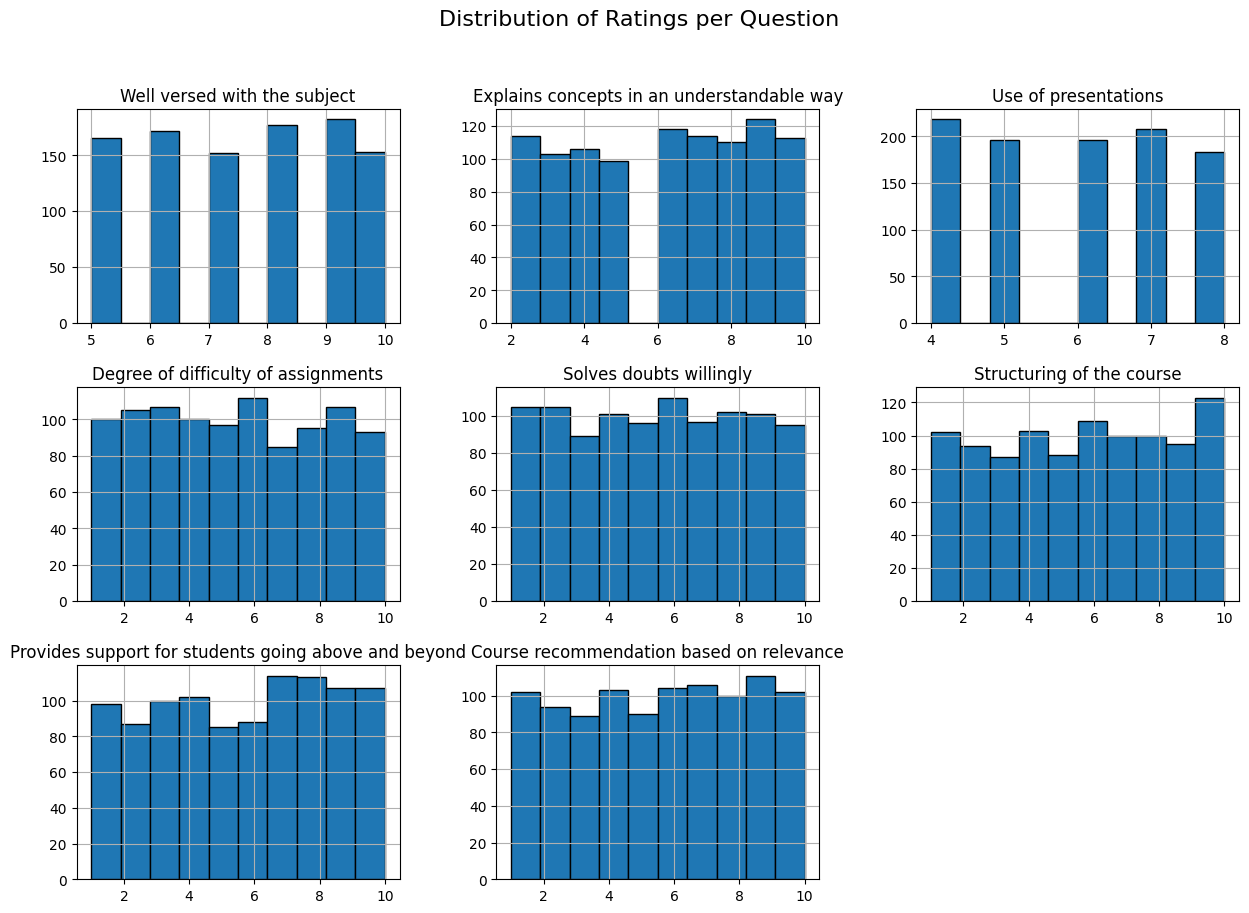

/tmp/ipython-input-2793561493.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")


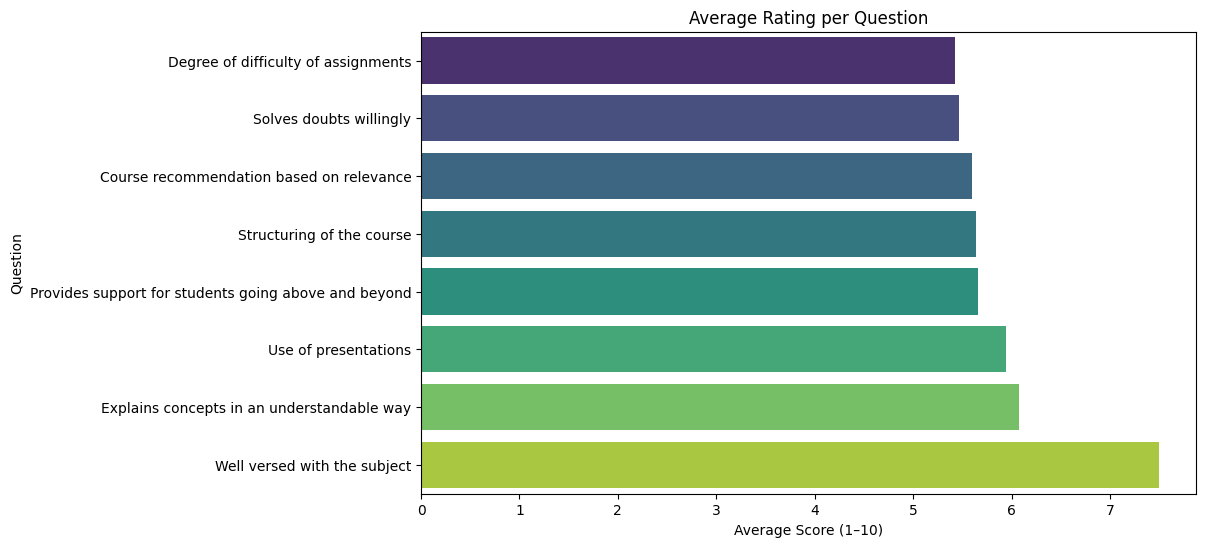

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution for each question
plt.figure(figsize=(12, 6))
df.drop(columns=["Student ID"], errors="ignore").hist(bins=10, figsize=(15, 10), edgecolor="black")
plt.suptitle("Distribution of Ratings per Question", fontsize=16)
plt.show()

# Or: average rating barplot per question
avg_scores = df.drop(columns=["Student ID"], errors="ignore").mean().round(2).sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")
plt.title("Average Rating per Question")
plt.xlabel("Average Score (1–10)")
plt.ylabel("Question")
plt.show()



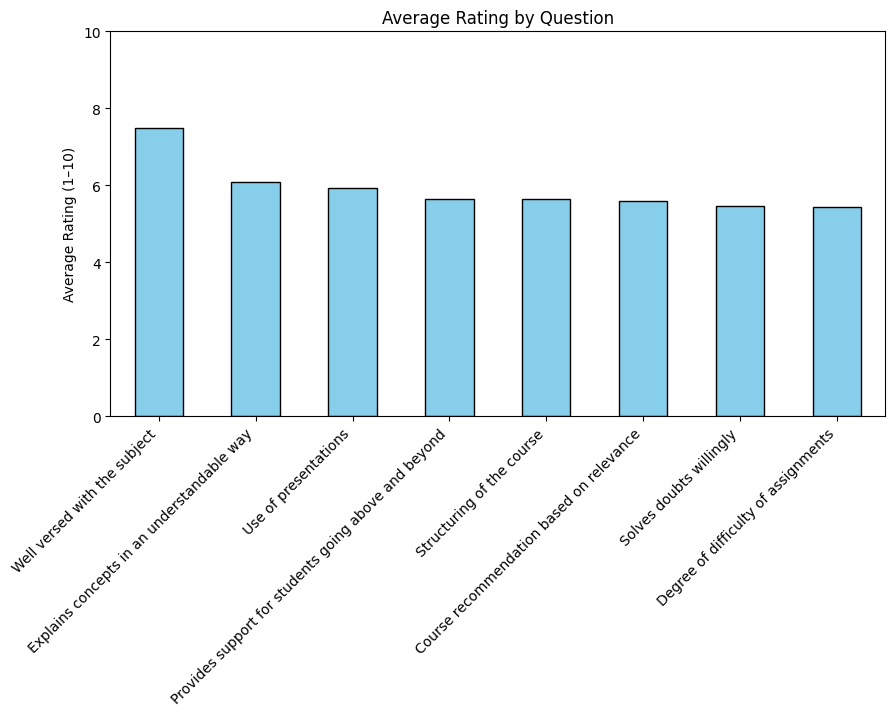

In [74]:
import matplotlib.pyplot as plt

# Calculate average per question
avg_scores = df.drop(columns=["Student ID"], errors="ignore").mean().round(2).sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_scores.plot(kind="bar", color="skyblue", edgecolor="black")
plt.ylim(0, 10)
plt.ylabel("Average Rating (1–10)")
plt.title("Average Rating by Question")
plt.xticks(rotation=45, ha="right")
plt.show()


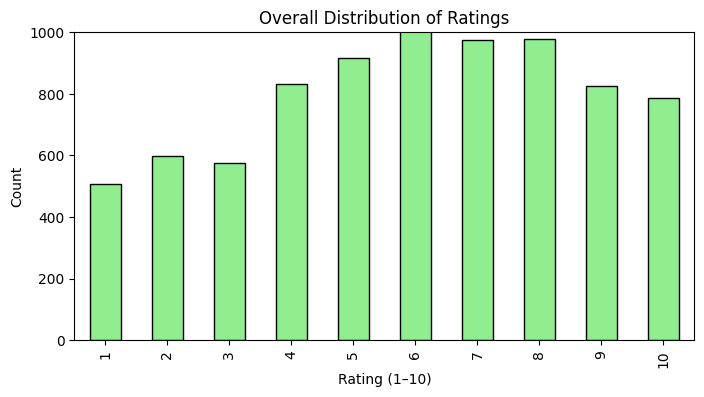

In [75]:
import matplotlib.pyplot as plt

# Flatten all ratings (excluding Student ID if present)
all_ratings = df.drop(columns=["Student ID"], errors="ignore").values.flatten()

plt.figure(figsize=(8,4))
pd.Series(all_ratings).value_counts().sort_index().plot(kind="bar", color="lightgreen", edgecolor="black")
plt.ylim(0, len(df))
plt.ylabel("Count")
plt.xlabel("Rating (1–10)")
plt.title("Overall Distribution of Ratings")
plt.show()


/tmp/ipython-input-965084220.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="crest")


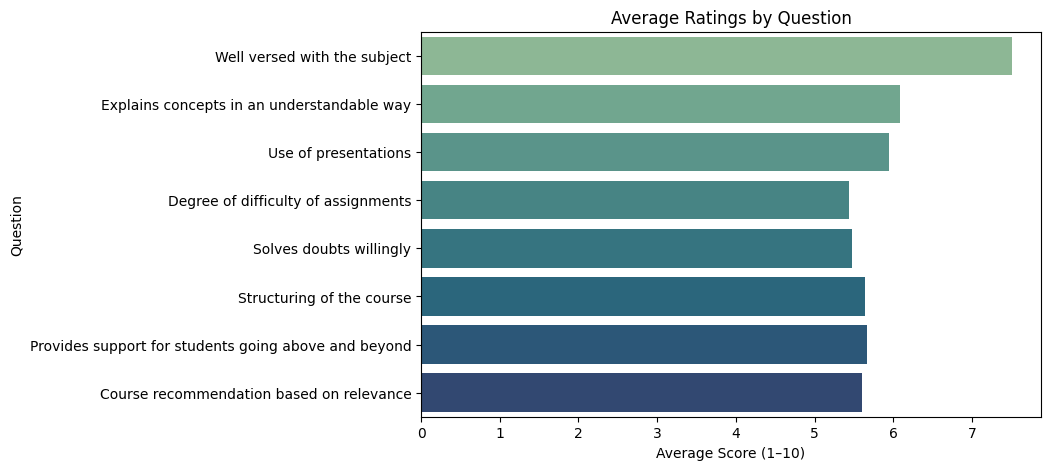

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average score per question
avg_scores = df.drop(columns=["Student ID"], errors="ignore").mean().round(2)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="crest")
plt.title("Average Ratings by Question")
plt.xlabel("Average Score (1–10)")
plt.ylabel("Question")
plt.show()


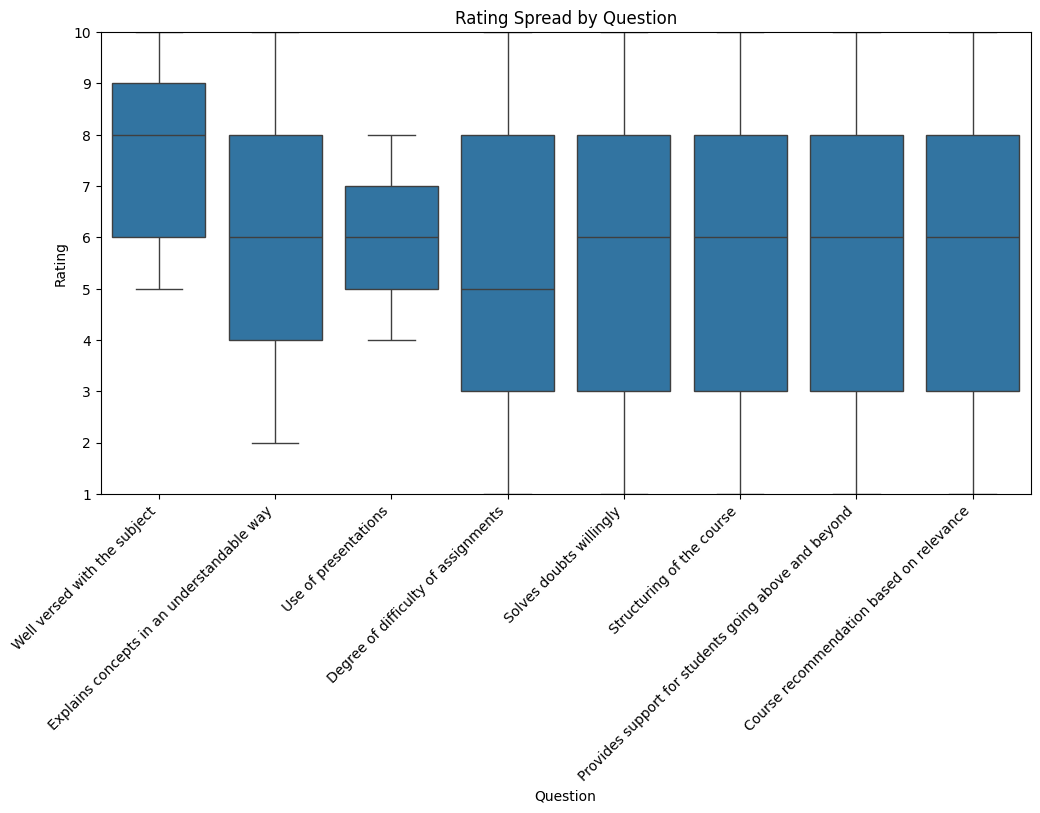

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe into long format (for boxplot per question)
df_melted = df.drop(columns=["Student ID"], errors="ignore").melt(var_name="Question", value_name="Rating")

plt.figure(figsize=(12,6))
sns.boxplot(x="Question", y="Rating", data=df_melted)
plt.title("Rating Spread by Question")
plt.ylim(1, 10)
plt.xticks(rotation=45, ha="right")
plt.show()


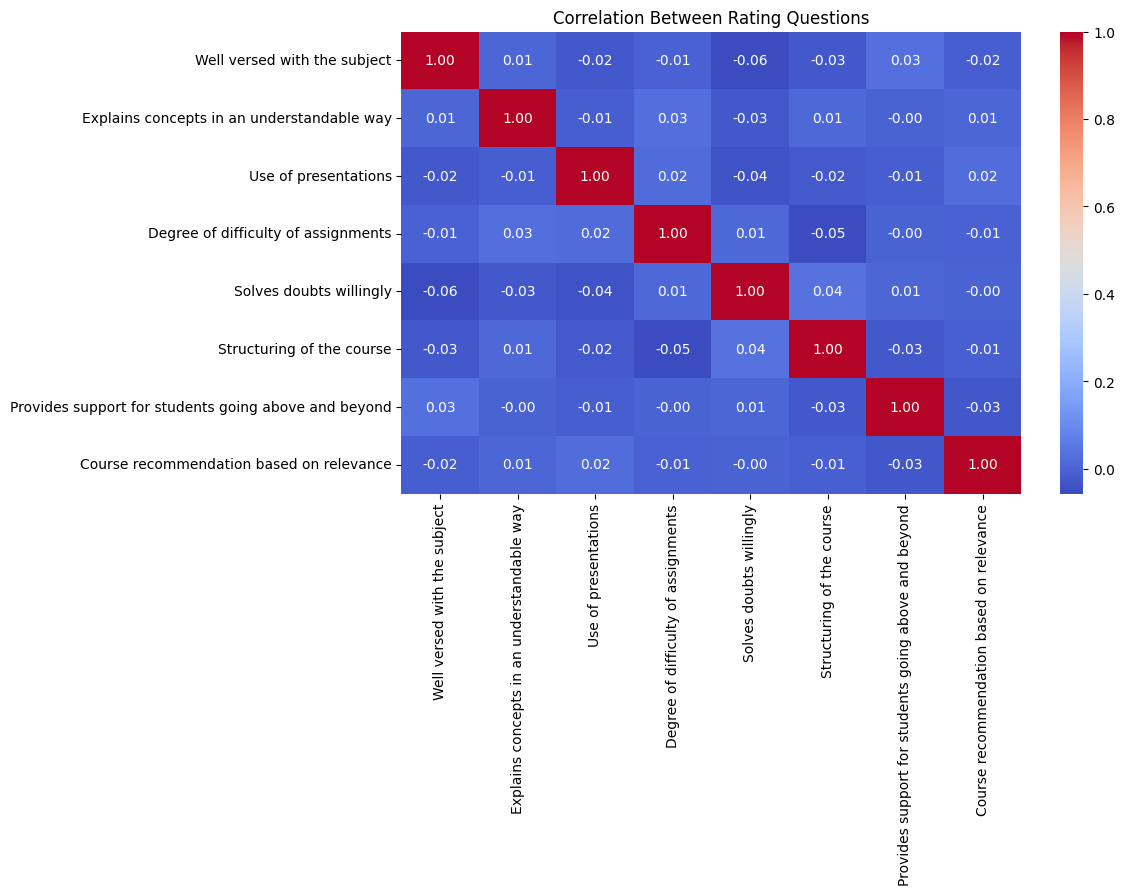

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (excluding Student ID if present)
corr = df.drop(columns=["Student ID"], errors="ignore").corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Rating Questions")
plt.show()


In [79]:
# --- Summary: Average & response count per question ---
summary = df.drop(columns=["Student ID"], errors="ignore").agg(["mean","count"]).T
summary = summary.rename(columns={"mean":"avg_rating","count":"responses"})
display(summary.round(2))

# --- Simple rules for recommendations ---
recs = []
low_questions = summary[summary["avg_rating"] < 6].index.tolist()
high_questions = summary[summary["avg_rating"] > 8].index.tolist()

if low_questions:
    recs.append(f"Focus improvement efforts on the following low-rated areas (<6 average): {', '.join(low_questions)}.")
if high_questions:
    recs.append(f"Maintain and highlight strengths in these high-rated areas (>8 average): {', '.join(high_questions)}.")
if not recs:
    recs.append("Overall satisfaction appears stable — continue current practices.")

print("\nRecommendations:")
for i, r in enumerate(recs, 1):
    print(f"{i}. {r}")



,avg_rating,responses
Well versed with the subject,7.50,1001.0
Explains concepts in an understandable way,6.08,1001.0
Use of presentations,5.94,1001.0
Degree of difficulty of assignments,5.43,1001.0
Solves doubts willingly,5.47,1001.0
Structuring of the course,5.64,1001.0
Provides support for students going above and beyond,5.66,1001.0
Course recommendation based on relevance,5.60,1001.0



Recommendations:
1. Focus improvement efforts on the following low-rated areas (<6 average): Use of presentations, Degree of difficulty of assignments, Solves doubts willingly, Structuring of the course, Provides support for students going above and beyond, Course recommendation based on relevance.


In [80]:
# --- Save cleaned dataset ---
df.to_csv("cleaned_feedback.csv", index=False)
df.to_excel("cleaned_feedback.xlsx", index=False)

print("✅ Cleaned data saved as 'cleaned_feedback.csv' and 'cleaned_feedback.xlsx' in the working directory.")

# --- Optional: in Colab, enable direct download ---
# from google.colab import files
# files.download("cleaned_feedback.xlsx")


✅ Cleaned data saved as 'cleaned_feedback.csv' and 'cleaned_feedback.xlsx' in the working directory.


# Project: Student Feedback Analysis — Task 3  
**Dataset:** `student_feedback.csv` — **1001 responses**

## Key findings
1. **Overall average rating (across all questions):** **5.92**
2. **Top 3 highest-rated questions:**  
   - *Well versed with the subject* — **7.50**  
   - *Explains concepts in an understandable way* — **6.08**  
   - *Use of presentations* — **5.94**
3. **Bottom 3 questions (improvement areas):**  
   - *Course recommendation based on relevance* — **5.60**  
   - *Solves doubts willingly* — **5.47**  
   - *Degree of difficulty of assignments* — **5.43**
4. **Strongest drivers of recommendation** (by correlation with **“Course recommendation based on relevance”**):  
   - *Use of presentations* — `r = 0.023`  
   - *Explains concepts in an understandable way* — `r = 0.009`  
   - *Solves doubts willingly* — `r = -0.001`
5. **Rating distribution snapshot (all questions combined):**  
   - **8–10:** 32.4%  
   - **5–7:** 36.2%  
   - **1–4:** 31.4%

---

## Top recommendations
1. **Improve low-rated aspects** (*recommendation relevance, doubt-solving, assignment difficulty*) with targeted actions (clearer rubrics, examples, support sessions).  
2. **Double-down on strengths** (*subject knowledge, concept clarity, presentations*) and share best practices across faculty.  
3. Since correlation is weak, **focus on holistic improvements** (communication, mentoring, interactive teaching) to lift overall recommendation.  
4. **Monitor progress**: re-measure after adjustments; track month-over-month shifts in average and distribution.

---

## Deliverables
- `cleaned_feedback.csv` / `cleaned_feedback.xlsx`  
- `question_averages.csv` (mean rating per question)  
- `overall_rating_distribution.csv` (count of each score 1–10 across all questions)  
- `correlation_matrix.csv` (Pearson r between questions)  
- PNG charts:  
  - `hist_per_question.png` (distributions per question)  
  - `avg_by_question.png` (bar chart of averages)  
  - `boxplots_by_question.png` (spread by question)  
  - `correlation_heatmap.png` (relationship between questions)

